In [1]:
import numpy as np
import pandas as pd 
%pylab inline
import matplotlib.pyplot as plt
# 分析华泰账户数据

Populating the interactive namespace from numpy and matplotlib


In [48]:


class StockProfile:
    code=''
    start_buy_date=''
    end_date=''
    max_pay=0
    
    buy = 0;
    vol_hold = 0;
    
    def __init__(self, code):
        self.code = code

    def info(self ):
        print( self.code , 
              '\t' ,self.start_buy_date,
              '\t' ,self.end_date,
              '\t' , self.buy,
              '\t' ,self.end_date - self.start_buy_date,
              '');
    
    def OnHandle(self , row):
        flag = row['flag']
        money = row['money']        
        vol = row['vol']  
        
        if(self.buy == 0 ):
            self.start_buy_date = row['date1']
        
        if( flag.find('证券买入') == 0 ):
            self.buy = self.buy - money
            self.vol_hold = self.vol_hold + vol
            #print(self.buy , ' -' , money)
        elif(  flag.find('证券卖出') == 0  ):
            self.buy = self.buy + money
            # 注意 华泰导出数据，卖出vol 用负数表示
            self.vol_hold =self.vol_hold + vol
            #print(self.buy , ' + ' , money)
        else :
            return 0
            
        if self.vol_hold ==0 :
            # 本次利润计算结束
            #print ('after saled out, earn :\t',  self.buy );
            #self.buy = 0;
            #self.vol_hold = 0;   
            #print ('start new ')
            self.end_date=row['date1']
            return 1 
        
        elif self.vol_hold < 0 :
            # erro data
            print ('can not caculate  ' , self.code)
            self.buy = 0;
            self.vol_hold = 0;    
        
        return 0;


def getCodeData(name , oneCodeData):
    a1 = oneCodeData.sort_values(['date1'])
    return a1

# 计算收益
def cacCodeRet( code, codeDetail):
    
    sp = StockProfile(code);
    
    for index, row in codeDetail.iterrows():
        ret = sp.OnHandle(row)
        if( 1 == ret ):
            #print('----');
            allProfiles.append(sp)
            
            # 新建对象
            sp = StockProfile(code);
            
        
    return ;


In [86]:

# 清洗数据
allProfiles = [];
data={}
#fileName='/Users/quchaodong/stu/py_research/tmp/ht/1his_ht2020.xls'
#data = pd.read_excel(fileName )
fileName='/Users/quchaodong/stu/py_research/tmp/ht/his_ht2020.xls'
data = pd.read_csv( fileName,   sep='\t',encoding='gbk')
#print(data.head())
colMap =  {
            "成交日期": "date1",        
            "证券代码": "code",
            "证券名称":"name",
            "操作":"flag",
             "成交均价":"price",
            "成交数量":"vol",
            "成交金额":"money"}


dt = data.rename(columns=colMap  ) 
usedCol = list(colMap.values()) 
print( usedCol )

# 按照代码分组
g= dt[usedCol].groupby('code')
allCodeDetail={}

for name, group in g:
    x = getCodeData (name , group)
    #print(x)
    allCodeDetail[name] = x
    
#计算每个股票收益    
#print(allCodeDetail[21])
for x in allCodeDetail:
    cacCodeRet( x , allCodeDetail[x])

print('')

for s in allProfiles:
    #print(s)
    s.info()

['date1', 'code', 'name', 'flag', 'price', 'vol', 'money']
can not caculate   2797
can not caculate   2815
can not caculate   300726

2384 	 20200205 	 20200211 	 999.0 	 6 
300037 	 20200205 	 20200212 	 273.0 	 7 
300377 	 20200212 	 20200217 	 952.0 	 5 
300450 	 20200205 	 20200211 	 246.0 	 6 
300498 	 20200217 	 20200219 	 714.0 	 2 
300726 	 20200206 	 20200207 	 240.0 	 1 
300726 	 20200213 	 20200219 	 874.0 	 6 
600516 	 20200206 	 20200210 	 30.0 	 4 
603730 	 20200205 	 20200206 	 284.0 	 1 
603960 	 20200205 	 20200206 	 225.0 	 1 


In [66]:
#按照日期，计算获利信息
earnsCode=[]
for s in allProfiles:
    a = {'code':s.code , 'earn':s.buy , 
         'in_date':s.start_buy_date,
         'hold_days':s.end_date - s.start_buy_date}
    earnsCode.append(a)
dt_earn = pd.DataFrame(earnsCode)
dt_a= dt_earn.sort_values('in_date').reset_index()

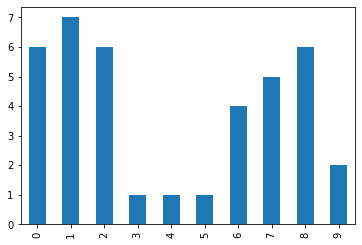

In [78]:
dt_a['hold_days'].plot.bar()

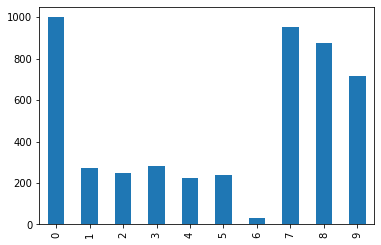

In [80]:
dt_a['earn'].plot.bar()